In [1]:
# Import standard packages
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

# Feature Engineering

In [12]:
# Import Data
df = pd.read_csv("/Users/ad/Documents/Exercises/_RgressionModeling/data/signage2015_kloof_seapoint.csv")
df.head()

,sign,Illuminated,Height,Width,Area,longitude,latitude,Suburb,illum
0,flatsgn,1,20.0,15.0,300.00,18.413518,-33.927335,Gardens,Yes
1,flatsgn,1,1.0,1.0,1.00,18.413378,-33.927435,Gardens,Yes
2,flatsgn,1,15.0,10.0,150.00,18.413138,-33.927596,Gardens,Yes
3,flatsgn,1,0.3,4.0,1.20,18.412546,-33.928151,Gardens,Yes
4,flatsgn,0,0.5,1.5,0.75,18.412608,-33.928158,Gardens,No


Note that the data is multivariate containing categorical and continous variables. Further, 'illum' maps 'Illuminated', hence we'll use only one of these. Noting that the variables represent a qualitative property, whether a sign is of type illuminated. Other categorical variables are 'Suburb' and 'sign'. As it stands, for classification algorithms one feature for each qualitative ascription is prefered. This is achieved by the one-hot-encoding.

## One Hot Enconding

In [13]:
# Ferret out the needed columns
feature_cols = ['Suburb', 'sign', 'illum', 'Width', 'Height', 'Area','latitude', 'longitude']

# One-Hot-Encoding
df_onehot = pd.get_dummies(df[feature_cols])
df_onehot.head()

,Width,Height,Area,latitude,longitude,Suburb_Gardens,Suburb_Seapoint,sign_bndrywll,sign_cnopy,sign_flatsgn,sign_projctng,illum_No,illum_Yes
0,15.0,20.0,300.00,-33.927335,18.413518,1,0,0,0,1,0,0,1
1,1.0,1.0,1.00,-33.927435,18.413378,1,0,0,0,1,0,0,1
2,10.0,15.0,150.00,-33.927596,18.413138,1,0,0,0,1,0,0,1
3,4.0,0.3,1.20,-33.928151,18.412546,1,0,0,0,1,0,0,1
4,1.5,0.5,0.75,-33.928158,18.412608,1,0,0,0,1,0,1,0


# Logist Regression Classifier

In [46]:
# Seperate data into target and features
feature_cols_onehot = df_onehot.loc[:, 'Width':'sign_projctng'].columns
X = df_onehot[feature_cols_onehot].values # Features
y = df_onehot['illum_Yes'].values # Target variable

In [47]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [49]:
# Logistic Regression with one-hot-encoded data
logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Confusion Matrix: \n", format(confusion_matrix(y_test, y_pred)))
print("\nAccuracy Score:", format(accuracy_score(y_test, y_pred)))
print("\nClassificatin Report:\n", format(classification_report(y_test, y_pred)))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("\nTest set score: {:.3f}".format(logreg.score(X_test, y_test)))

Confusion Matrix: 
 [[58 21]
 [63 38]]

Accuracy Score: 0.5333333333333333

Classificatin Report:
               precision    recall  f1-score   support

           0       0.48      0.73      0.58        79
           1       0.64      0.38      0.47       101

    accuracy                           0.53       180
   macro avg       0.56      0.56      0.53       180
weighted avg       0.57      0.53      0.52       180

Training set score: 0.594

Test set score: 0.533


/Users/ad/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Logistic regression without one-hot-encoded data

# Map Sign Attributes
df['sign_mapped'] = df['sign'].map({'bndrywll': 1, 'cnopy': 2, 'flatsgn': 3, 'projctng': 4})
df['suburb_mapped'] = df['Suburb'].map({'Gardens': 1, 'Seapoint': 2})

feature_cols = ['sign_mapped', 'Width', 'Height', 'Area','latitude', 'longitude', 'suburb_mapped']
X = df[feature_cols].values # Features
y = df['Illuminated'].values # Target variable

# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Confusion Matrix: \n", format(confusion_matrix(y_test, y_pred)))
print("\nAccuracy Score:", format(accuracy_score(y_test, y_pred)))
print("\nClassificatin Report:\n", format(classification_report(y_test, y_pred)))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("\nTest set score: {:.3f}".format(logreg.score(X_test, y_test)))

Confusion Matrix: 
 [[64 15]
 [67 34]]

Accuracy Score: 0.5444444444444444

Classificatin Report:
               precision    recall  f1-score   support

           0       0.49      0.81      0.61        79
           1       0.69      0.34      0.45       101

    accuracy                           0.54       180
   macro avg       0.59      0.57      0.53       180
weighted avg       0.60      0.54      0.52       180

Training set score: 0.598

Test set score: 0.544


## Tranforming Data

In [ ]:
# Transformation
from sklearn.preprocessing import RobustScaler

robust_scale = RobustScaler()
robust_scale.fit(X_train)

X_train_scaled = robust_scale.transform(X_train)
X_test_scaled = robust_scale.transform(X_test)

In [ ]:
logreg_scaled = LogisticRegression().fit(X_train_scaled, y_trainra)
y_pred = logreg_scaled.predict(X_test)

print("Confusion Matrix: \n", format(confusion_matrix(y_test, y_pred)))
print("\nAccuracy Score:", format(accuracy_score(y_test, y_pred)))
print("\nClassificatin Report:\n", format(classification_report(y_test, y_pred)))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("\nTest set score: {:.3f}".format(logreg.score(X_test, y_test)))

In [18]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
y_pred = logreg100.predict(X_test)
print("Confusion Matrix: \n", format(confusion_matrix(y_test, y_pred)))
print("\nAccuracy Score:", format(accuracy_score(y_test, y_pred)))
print("\nClassificatin Report:\n", format(classification_report(y_test, y_pred)))
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("\nTest set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Confusion Matrix: 
 [[58 21]
 [63 38]]

Accuracy Score: 0.5333333333333333

Classificatin Report:
               precision    recall  f1-score   support

           0       0.48      0.73      0.58        79
           1       0.64      0.38      0.47       101

    accuracy                           0.53       180
   macro avg       0.56      0.56      0.53       180
weighted avg       0.57      0.53      0.52       180

Training set score: 0.594

Test set score: 0.533


/Users/ad/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From the confusion matrix we can conclude that:
the number of signs correctly classified as illuminated is 49 (i.e., True Positive);
the number of signs correctly classified as un-illimunated is 53 (i.e., True Negative);
the number of un-illuminated signs classified as illuminated is 26 (i.e., False Positive);
and the number of illuminated signs wrongly classified as un-illuminated is 52 (i.e., False Negative)

Accuracy Score = Correct Predictions / Total Predictions. Or the number of successfull predictions:
(True Positives + True Negatives) / (Total in test sample) = (49 + 53) / (0.25 * 720) = 0.5667

Recall Score (or true positive rate) = Percentage of illuminated signs identified correctly:
(True Positive) / (True Positve + False Negative) = 49 / (49 + 52) = 0.485

Precision Score = Percentage of signs identified as illimiated that are actually illuminated:
(True Positive) / (True Positive + False Positive) = 49 / (49 + 26) = 0.653

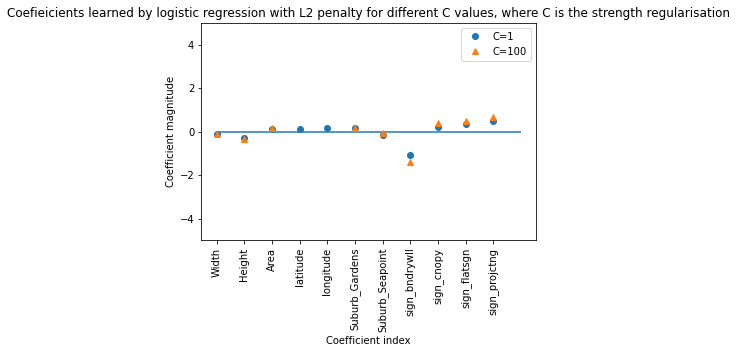

In [86]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.xticks(range(X.shape[1]), feature_cols, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.title("Coefieicients learned by logistic regression with L2 penalty for different C values, where C is the strength regularisation")
plt.legend()

# Linear Support Vector Machines

In [87]:
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("Confusion Matrix: \n", format(confusion_matrix(y_test, y_pred)))
print("\nAccuracy Score:", format(accuracy_score(y_test, y_pred)))
print("\nClassificatin Report:\n", format(classification_report(y_test, y_pred)))
print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("\nTest set score: {:.3f}".format(svc.score(X_test, y_test)))

Confusion Matrix: 
 [[ 79   0]
 [101   0]]

Accuracy Score: 0.4388888888888889

Classificatin Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.61        79
           1       0.00      0.00      0.00       101

    accuracy                           0.44       180
   macro avg       0.22      0.50      0.31       180
weighted avg       0.19      0.44      0.27       180

Training set score: 0.539

Test set score: 0.439


/Users/ad/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ad/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Trees

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0, max_depth=6).fit(X_train, y_train)
# tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Confusion Matrix: \n", format(confusion_matrix(y_test, y_pred)))
print("\nAccuracy Score:", format(accuracy_score(y_test, y_pred)))
print("\nClassificatin Report:\n", format(classification_report(y_test, y_pred)))
print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("\nTest set score: {:.3f}".format(tree.score(X_test, y_test)))

Confusion Matrix: 
 [[67 12]
 [55 46]]

Accuracy Score: 0.6277777777777778

Classificatin Report:
               precision    recall  f1-score   support

           0       0.55      0.85      0.67        79
           1       0.79      0.46      0.58       101

    accuracy                           0.63       180
   macro avg       0.67      0.65      0.62       180
weighted avg       0.69      0.63      0.62       180

Training set score: 0.772

Test set score: 0.628


## Feature Importance

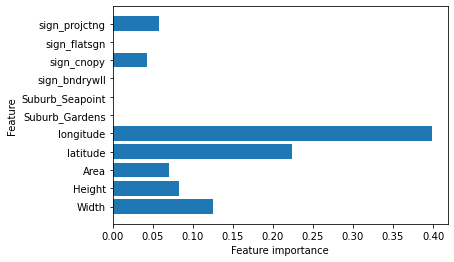

In [88]:
def plot_feature_importance(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_cols)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importance(tree)

# Random Forest Classifier

Confusion Matrix: 
 [[65 14]
 [47 54]]

Accuracy Score: 0.6611111111111111

Classificatin Report:
               precision    recall  f1-score   support

           0       0.58      0.82      0.68        79
           1       0.79      0.53      0.64       101

    accuracy                           0.66       180
   macro avg       0.69      0.68      0.66       180
weighted avg       0.70      0.66      0.66       180

Training set score: 0.981

Test set score: 0.661


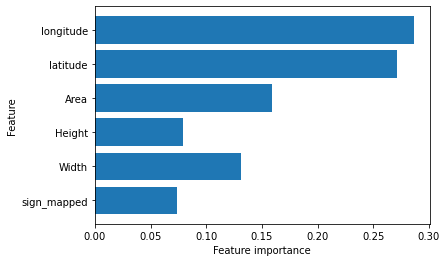

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Build 5 trees
forest = RandomForestClassifier(n_estimators=10, 
                                max_features="sqrt", 
                                max_depth=None, 
                                min_samples_split=2,
                                bootstrap=True)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Confusion Matrix: \n", format(confusion_matrix(y_test, y_pred)))
print("\nAccuracy Score:", format(accuracy_score(y_test, y_pred)))
print("\nClassificatin Report:\n", format(classification_report(y_test, y_pred)))
print("Training set score: {:.3f}".format(forest.score(X_train, y_train)))
print("\nTest set score: {:.3f}".format(forest.score(X_test, y_test)))

plot_feature_importance(forest)

TypeError: '(slice(None, None, None), 0)' is an invalid key

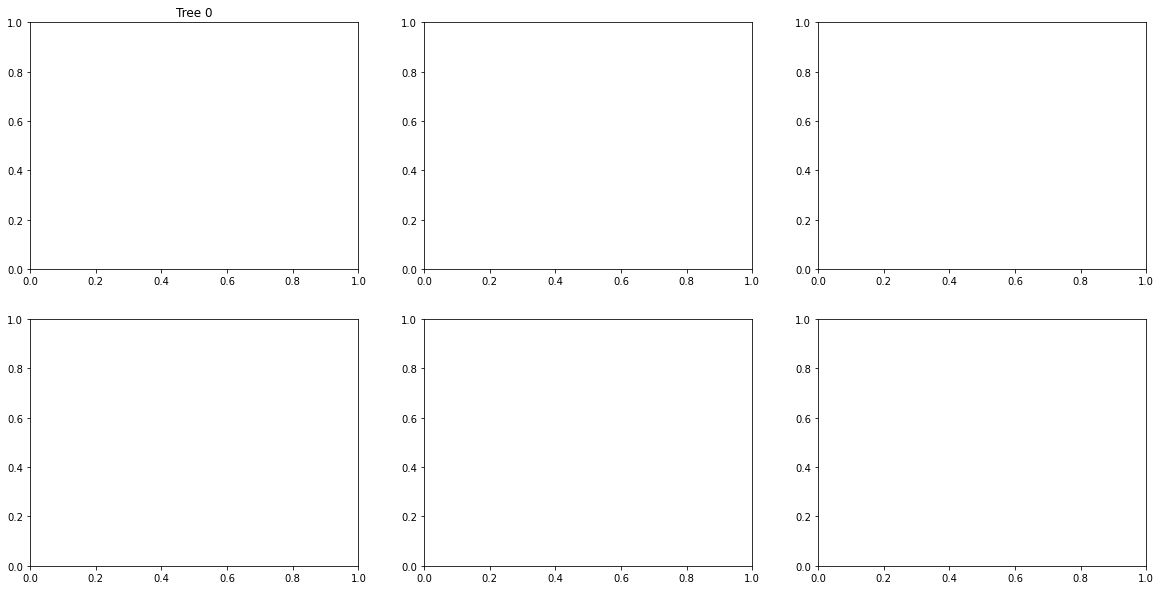

In [30]:
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_seperator(forest, X_train, fill=True, ax=axes[-1, -1],
                               alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)